Conteo de resultados (Shots):
{'001': 36, '101': 33, '000': 30, '010': 40, '110': 34, '100': 25, '011': 25, '111': 801}


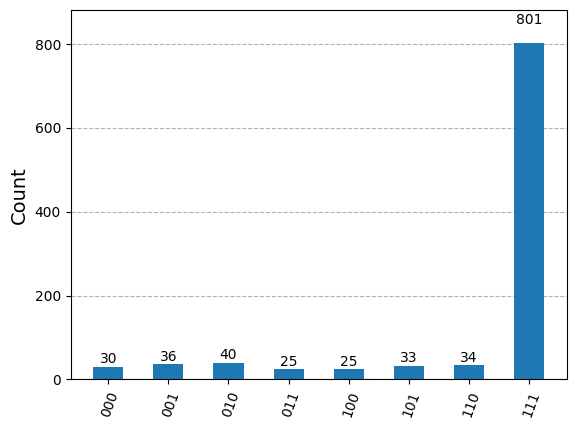

In [1]:
# --- IMPORTAMOS LAS HERRAMIENTAS ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. PREPARACIÓN DEL HARDWARE VIRTUAL
# 3 Qubits para las cajas, 3 Bits clásicos para leer el resultado
qc = QuantumCircuit(3, 3)

# ---------------------------------------------------------
# FASE 1: SUPERPOSICIÓN (La base de datos completa)
# Ponemos los 3 qubits en estado |+> (Hadamard)
# ---------------------------------------------------------
qc.h([0, 1, 2])
qc.barrier() 

# ---------------------------------------------------------
# FASE 2: EL ORÁCULO (TU DESAFÍO)
# Buscamos el estado |111> (q0=1, q1=1, q2=1).
# Lógica: Cambiar fase solo si TODOS son 1.
# Construcción manual de una CCZ (Controlled-Controlled-Z):
# ---------------------------------------------------------

# 1. Ponemos H en el objetivo (digamos q2) para llevarlo al eje X
qc.h(2)

# 2. Aplicamos Toffoli (CCX). Si q0 y q1 son 1, invierte q2.
# Como q2 está en eje X, esto equivale a invertir la FASE.
qc.ccx(0, 1, 2) 

# 3. Quitamos la H del objetivo para volver a la base normal
qc.h(2)

qc.barrier()

# ---------------------------------------------------------
# FASE 3: EL DIFUSOR (El Espejo de Grover)
# Esto amplifica la probabilidad de la solución marcada
# ---------------------------------------------------------
qc.h([0, 1, 2])
qc.x([0, 1, 2])

# Otra vez el truco del sándwich para la multi-controlada
qc.h(2)
qc.ccx(0, 1, 2)
qc.h(2)

qc.x([0, 1, 2])
qc.h([0, 1, 2])
qc.barrier()

# ---------------------------------------------------------
# FASE 4: MEDICIÓN
# ---------------------------------------------------------
qc.measure([0, 1, 2], [0, 1, 2])

# --- EJECUCIÓN EN SIMULADOR ---
sim = AerSimulator()
job = sim.run(transpile(qc, sim), shots=1024)
result = job.result()
counts = result.get_counts()

# --- RESULTADOS ---
print("Conteo de resultados (Shots):")
print(counts)

# Dibujamos el gráfico
plot_histogram(counts)